In [75]:
#Installing scipy
!pip install scipy

In [76]:
#Installing numpy
!pip install numpy

In [77]:
#Installing matplotlib
!pip install matplotlib


<br>Implement the counting measure in Python. Test that it satisfies additivity on the disjoint sets {"a", "b", "c"}, {"d", "e", "f"}.
<br>Hint: If you have never written a Python function, read https://www.w3schools.com/python/python_ functions.asp, if you have never used Python sets, read https://www.w3schools.com/python/python_ sets.asp.<br>



In [78]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

In [79]:
#Exercise 1

def Additivity_and_Counting_Measure(set1, set2):
    
    # Checking if input is set
    if not (isinstance(set1, set) and isinstance(set2, set)):
        raise TypeError("Please make sure that the inputs are sets")
    
    # Calculating counting measures for both sets
    measure1 = len(set1)
    measure2 = len(set2)

    # Calculating counting measure for the union of the sets
    union_measure = len(set1.union(set2))
    union_set = set1.union(set2)
    
    # Checking additivity
    if measure1 + measure2 == union_measure:
        return True, union_set, measure1, measure2, union_measure
    else:
        return False, union_set, measure1, measure2, union_measure

# Testing counting measure for additivity for below inputs
set1 = {"a", "b", "c"}
set2 = {"d", "e", "f"}

#Calling the function
output, union_set, measure1, measure2, union_measure = Additivity_and_Counting_Measure(set1, set2)

#Printing the output
print("The Union set of set1 and set2 is: {}".format(union_set))
print("The Additivity on Disjoint sets is: {}".format(output))
print("The Measure of Set 1: {}".format(measure1))
print("The Measure of Set 2: {}".format(measure2))
print("The Measure of Union: {}".format(union_measure))


The Union set of set1 and set2 is: {'a', 'c', 'b', 'e', 'd', 'f'}
The Additivity on Disjoint sets is: True
The Measure of Set 1: 3
The Measure of Set 2: 3
The Measure of Union: 6




<br> Create a Python class which implements intervals. Use this new data type to write a function which implements the length measure on intervals. Test it on the interval [135].<br>
Hint: If you have never written a Python class, read https://www.w3schools.com/python/python_classes.asp.

 <br>

In [80]:
#Exercise 2 

from scipy.integrate import quad

#Creating a class named Intervals
class Intervals:
    function=1
    def __init__(self,int1,int2):
        
        #Raising type error if the intervals are not numeric
        if not isinstance(int1, (int,float)) or not isinstance(int2, (int,float)):
            raise TypeError("Intervals must be numeric")
        self.function = lambda a:1
        self.int1 = int1
        self.int2  = int2
     #Raising value error if interval limits are wrong
    def integrate_func(self):
        if self.int1 > self.int2:
            raise ValueError("Lower limit must be lesser than or equal to upper limit")
        return quad(self.function,self.int1,self.int2)

interval_input = Intervals(1,3.5)

print("The length of interval funtion is {}",interval_input.integrate_func())



The length of interval funtion is {} (2.5, 2.7755575615628914e-14)


In [81]:
#Uncomment this to raise error
#interval_input = Intervals(1,'u')

<br> Import scipy.stats in order to access the scipy.stats.expon distribution. This implements the exponential distribution Exp( ). Make sure you read the documentation https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html to understand how it works and how the parameter is encoded. Using the cdf method of scipy.stats.expon define a function called expon_measure which will take as input an interval (defined in the previous question) and will return its probability mass under the probability measure Exp(2) (i.e. = 2). 
<br>Test your function by computing the probability measure of the following intervals:<br>
(a) [0,1]<br>
<br>(b) [1,1]<br>
<br>(c) [1,10]<br>
<br>(d) [0,infinity )<br>

Plot the pdf of Exp(2) on comment on whether your answers seem to make sense visually <br>


In [82]:
from scipy.stats import expon
import numpy as np
import matplotlib.pyplot as plt

In [83]:
#Exercise 3

def expon_measure(interval):
    exponential_distribution = scipy.stats.expon(scale = 1/2) #scale is 1/lambda
    probability_mass = exponential_distribution.cdf(interval[1]) - exponential_distribution.cdf(interval[0]) #
    return probability_mass

#Inputting different intervals to check the function
interval_1 = [0,1]
interval_2 = [1,1]
interval_3 = [1,10]
interval_4 = [0,float("inf")] #Infinity is expressed as float("inf") 

#Calling the function
probability_1 = expon_measure(interval_1)
probability_2 = expon_measure(interval_2)
probability_3 = expon_measure(interval_3)
probability_4 = expon_measure(interval_4)

#Displaying probability measures of different intervals
print("The Probability Measure of {} is {}".format(interval_1,probability_1))
print("The Probability Measure of {} is {}".format(interval_2,probability_2))
print("The Probability Measure of {} is {}".format(interval_3,probability_3))
print("The Probability Measure of {} is {}".format(interval_4,probability_4))




The Probability Measure of [0, 1] is 0.8646647167633873
The Probability Measure of [1, 1] is 0.0
The Probability Measure of [1, 10] is 0.13533528117545912
The Probability Measure of [0, inf] is 1.0


##### Testing for interval from Previous question


In [84]:
interval_previous_question = [1,3.5]
probability_5 = expon_measure(interval_previous_question)
print("The Probability Measure of {} is {}".format(interval_previous_question, probability_5))

The Probability Measure of [1, 3.5] is 0.13442340127105823


##### Plotting the Probability Density Function of Exponential distribution of 2

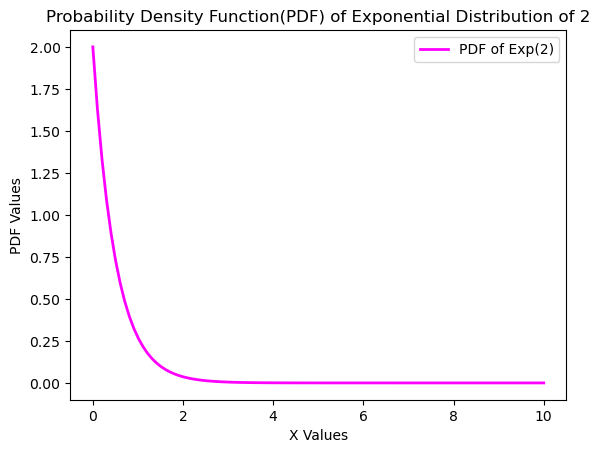

In [85]:
#Plotting the distribution of Exp(2)

exponential_distribution = scipy.stats.expon(scale = 1/2) #scale is 1/lambda
x = np.linspace(0,10,100) #Creating x values for pdf plot

Probability_Density_Function_Values = exponential_distribution.pdf(x)


plt.plot(x, Probability_Density_Function_Values, linewidth = 2, color = 'magenta',label = "PDF of Exp(2)")
plt.xlabel("X Values") #Labelling the X axis
plt.title("Probability Density Function(PDF) of Exponential Distribution of 2") #Setting title for the figure
plt.ylabel("PDF Values") #Labelling the Y axis
plt.legend()
plt.show()

##### Comment on whether your answers seem to make sense visually

##### Explanation

The above code plots a PDF of Exponential Distribution of 2 over the interval of [0,10].

(a) Interval [0, 1]:- The probability measure calculated represents the area under the PDF curve between 0 and 1. From the plot, we can observe that this interval is the first part of the curve, where the PDF has a high value. Therefore, the probability measure should be relatively large, which matches the calculated result.
<br>(b) Interval [1, 1]:- the PDF is very close to 0 at x = 1, meaning that the probability of an event occurring exactly at x = 1 is extremely low. Therefore, the probability measure is very close to 0, which matches the calculated result.
<br>(c) Interval [1, 10]:- The PDF decreases but still has some value. Therefore, the probability measure calculated for this interval should also be significant, which matches the calculated result.
<br>(d) Interval [0, ∞]:- The PDF is infinite. Therefore, the probability measure should be equal to 1, which matches the calculated result.<br>
<br>In conclusion, the visual characteristics of the Exponential(2) distribution and the probability measures calculated in Exercise 3 align with the expected behavior of the distribution, making sense visually. <br>



<br>Using the pdf method of scipy.stats.expon, define a function called expon_pdf which will
 take one argument x and return the pdf of the probability measure Exp(2) evaluated at x. Import
 the integration routine quad from scipy.integrate, and read the documentation https://docs.scipy.
 org/doc/scipy/reference/generated/scipy.integrate.quad.html to see how it works. Use quad to
 compute and print the following integrals
<br>
(a) $$\int_{0}^{1} expon\_pdf(x) \, dx$$
<br>
<br>
(a) $$\int_{1}^{1} expon\_pdf(x) \, dx$$
<br>
<br>
(a) $$\int_{1}^{10} expon\_pdf(x) \, dx$$
<br>
<br>
(a) $$\int_{0}^{-\infty} expon\_pdf(x) \, dx$$
<br>
<br>Compare your answers with those of the previous question. What do you see? Why is this the case

<br>

In [86]:
#Exercise 4

from scipy.stats import expon
from scipy.integrate import quad

# Define the Exponential PDF function for Exponential of 2
def expon_pdf(x):
    return expon.pdf(x, scale = 1/2)  # The scale parameter is 1/lambda

# Calculate and print the specified integrals
integral_a, error_a = quad(expon_pdf, 0, 1)
integral_b, error_b = quad(expon_pdf, 1, 1)
integral_c, error_c = quad(expon_pdf, 1, 10)
integral_d, error_d = quad(expon_pdf, 0, float('inf'))

#Calculating the integral from previous exercise
integral_e, error_e = quad(expon_pdf, 1, 3.5)
print("The Integral from 1,3.5 of Exp(2) is {} and Error is {}".format(integral_e,error_e))
print("\n")
#Printing
print("(a) The Integral from 0 to 1 of Exp(2) is {} and Error is {}".format(integral_a,error_a))
print("(b) The Integral from 1 to 1 of Exp(2) is {} and Error is {}".format(integral_b,error_b))
print("(c) The Integral from 1 to 10 of Exp(2) is {} and Error is {}".format(integral_c, error_c))
print("(d) The Integral from 0 to infinity of Exp(2) is {} and Error is {}".format(integral_d, error_d))




The Integral from 1,3.5 of Exp(2) is 0.13442340127105817 and Error is 1.4923995513955532e-15


(a) The Integral from 0 to 1 of Exp(2) is 0.8646647167633873 and Error is 9.599706771317021e-15
(b) The Integral from 1 to 1 of Exp(2) is 0.0 and Error is 0.0
(c) The Integral from 1 to 10 of Exp(2) is 0.13533528117545912 and Error is 2.4502060294750603e-09
(d) The Integral from 0 to infinity of Exp(2) is 0.9999999999999999 and Error is 1.5470064009984758e-10


##### Compare your answers with those of the previous question. What do you see? Why is this the case?

##### Explanation
<br>The results from Exercise 3 and 4 for the intervals [0,1], [1,1], [1,10] and [0,infinity] display the same results as they represent the same underlying probability measures. When we integrate the PDF we obtain the CDF and then if we differentiate the CDF to get back the PDF. There is a slight difference but it is neglibile. <br>